# **Optimization metrics experiments**

In [0]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

In [0]:
# run optimization
class OptimizationMetricsExperiment:

  # class atributes
  nt = 24  # number of time steps
  
  def __init__(self, peak_time, peak_magnitude, outlier):
    """ Constructor.

      Args:
        peak_time (int): peak-time.
        peak_magnitude (int): relative peak-to-peak magnitude.
        outlier (boolean): insert or not outlier.
    """

    # set arguments
    self.peak_time = np.max([np.min([23, peak_time]), 0])
    self.peak_magnitude = np.max([peak_magnitude, 1.])
    self.outlier = outlier

    # generation
    self.t = np.array([])
    self.p = np.array([])

  def generate_sample(self):
    """ Generate generation sceneario.

      Outputs:
        t (np.array): (24, 1)-array containg the timestep.
        p (np.array): (24, 1)-array containg the profile.
    """

    # timestep
    self.t = np.arange(0, self.nt)

    # generation data
    p = np.ones(self.nt, )
    p[self.peak_time-2:self.peak_time+2] = self.peak_magnitude
    p[[self.peak_time-3, self.peak_time+2]] = np.max([self.peak_magnitude/2, 1])
    p[[self.peak_time-4, self.peak_time+3]] = np.max([self.peak_magnitude/3, 1])
    
    # with outliers
    if self.outlier:
      p[[0, 4, 7]] = 0.

    # output
    self.p = p

  # approximation of the generation function
  def f(self, beta):
    return beta[0]*norm.pdf(self.t, loc=beta[1], scale=beta[2]) + beta[3]

  # error metrics
  def weighted_error(self, beta):
    w = self.p # weights
    return np.mean((self.p - self.f(beta))**2 * w**2)

  def percent_mean_error(self, beta):
    return np.mean(np.abs(self.p - self.f(beta))/(self.p+1e-3))

  def percent_max_error(self, beta):
    return np.max(np.abs(self.p - self.f(beta))/(self.p+1e-3))

  def max_abs_error(self, beta):
    return np.max(np.abs(self.p - self.f(beta)))

  def mean_squared_error(self, beta):
    return np.mean((self.p - self.f(beta))**2)

  #  run optimization
  def run(self, method='Powell'):

    # generate data
    self.generate_sample()

    # initial guess
    x0 = np.array([self.peak_magnitude, self.peak_time, 1, 1])

    # optimization
    res_mean = minimize(self.mean_squared_error, x0, method=method)
    res_w = minimize(self.weighted_error, x0, method=method)
    res_pm = minimize(self.percent_mean_error, x0, method=method)
    res_pma = minimize(self.percent_max_error, x0, method=method)
    res_ma = minimize(self.max_abs_error, x0, method=method)

    # plot
    plt.figure(figsize=(10,5))
    plt.bar(self.t, self.p, color='white', edgecolor='black', label='Demand')
    plt.plot(self.t, self.f(res_mean.x), 'ro', label='Fit (Mean squared error)')
    plt.plot(self.t, self.f(res_w.x), 'k*', label='Fit (Weighted mean squared error)')
    plt.plot(self.t, self.f(res_pm.x), 'c.', label='Fit (Percent mean error)')
    plt.plot(self.t, self.f(res_pma.x), 'bd', label='Fit (Max. percent error)')
    plt.plot(self.t, self.f(res_ma.x), 'g.', label='Fit (Max. absolute error)')
    plt.ylabel("Generation (MWh/h)")
    plt.xlabel("Hour (h)")
    plt.legend()
    plt.show()

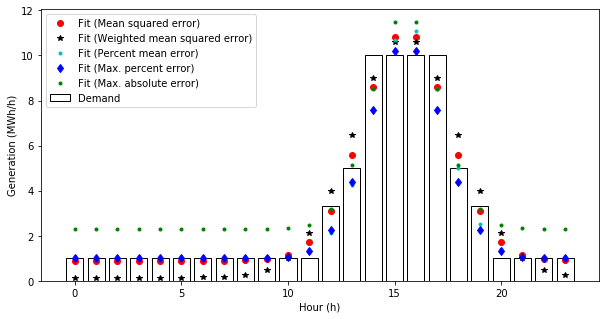

In [3]:
# run test scenario 1
peak_time = 16
peakm = 9
outlier = False
scenario1 = OptimizationMetricsExperiment(peak_time=16,
                                          peak_magnitude=10,
                                          outlier=False)
scenario1.run()

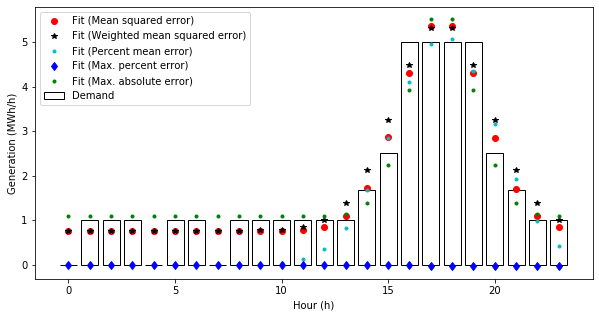

In [4]:
# run test scenario 2
scenario2 = OptimizationMetricsExperiment(peak_time=18,
                                          peak_magnitude=5,
                                          outlier=True)
scenario2.run()